In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np
import datetime as dt
import time
plt.style.use('dark_background')

In [68]:
df = pd.read_csv("dataset.csv")
print(len(df))

540364


<AxesSubplot:ylabel='temperature'>

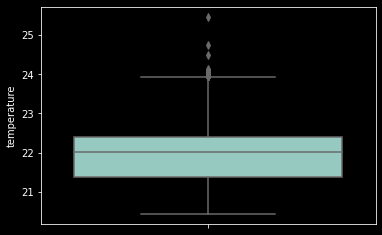

In [69]:
sns.boxplot(y="temperature", data=df)

<AxesSubplot:>

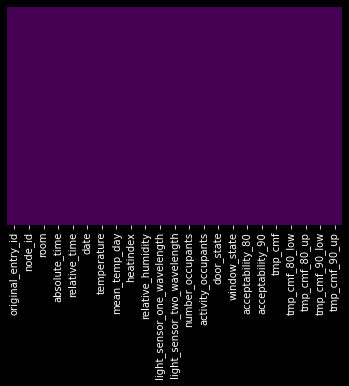

In [70]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [71]:
df.columns

Index(['original_entry_id', 'node_id', 'room', 'absolute_time',
       'relative_time', 'date', 'temperature', 'mean_temp_day', 'heatindex',
       'relative_humidity', 'light_sensor_one_wavelength',
       'light_sensor_two_wavelength', 'number_occupants', 'activity_occupants',
       'door_state', 'window_state', 'acceptability_80', 'acceptability_90',
       'tmp_cmf', 'tmp_cmf_80_low', 'tmp_cmf_80_up', 'tmp_cmf_90_low',
       'tmp_cmf_90_up'],
      dtype='object')

In [72]:
df['date'] =pd.to_datetime(df.date)
df = df.sort_values(by='date')
def create_year_column(row):
    if row['date'].year == 2017:
        return 2017
    else:
        return 2016


df['year'] = df.apply(create_year_column, axis=1)

# Multivariate

## temperature

TODO: make it so its mean temp per hour per selected month

In [73]:
df[["temperature",]].mean()

temperature    21.966373
dtype: float64

In [74]:
date_mean_2016 = df[df['date'].dt.year == 2016]
date_mean_2017 = df[df['date'].dt.year == 2017]

mean_dict_2016 = {}
for index, row in date_mean_2016.iterrows():
    month = row['date'].month
    if month not in mean_dict_2016:
        mean_dict_2016[month] = df[df['date'].dt.month == month]['temperature'].mean()


mean_dict_2017 = {}
for index, row in date_mean_2017.iterrows():
    month = row['date'].month
    if month not in mean_dict_2017:
        mean_dict_2017[month] = df[df['date'].dt.month == month]['temperature'].mean()        

mean_dict_both = {}
for index, row in df.iterrows():
    month = row['date'].month
    year = row['date'].year
    year_month = str(month) + "/" + str(year)
    if year_month not in mean_dict_both:
        month_frame = df[df['date'].dt.month == month] 
        year_frame = month_frame[month_frame['date'].dt.year == year] 
        mean_dict_both[year_month] =  year_frame['temperature'].mean()


In [75]:
mean_dict_2017 = pd.DataFrame(data=mean_dict_2017.items(), columns=['date', 'mean'])
mean_dict_2016 = pd.DataFrame(data=mean_dict_2016.items(), columns=['date', 'mean'])
mean_dict = pd.DataFrame(data=mean_dict_both.items(), columns=['date', 'mean'])

In [76]:
def create_year_column(row):
    if "2017" in row['date'] :
        return 2017
    else:
        return 2016


mean_dict['year'] = mean_dict.apply(create_year_column, axis=1)

(20.0, 25.0)

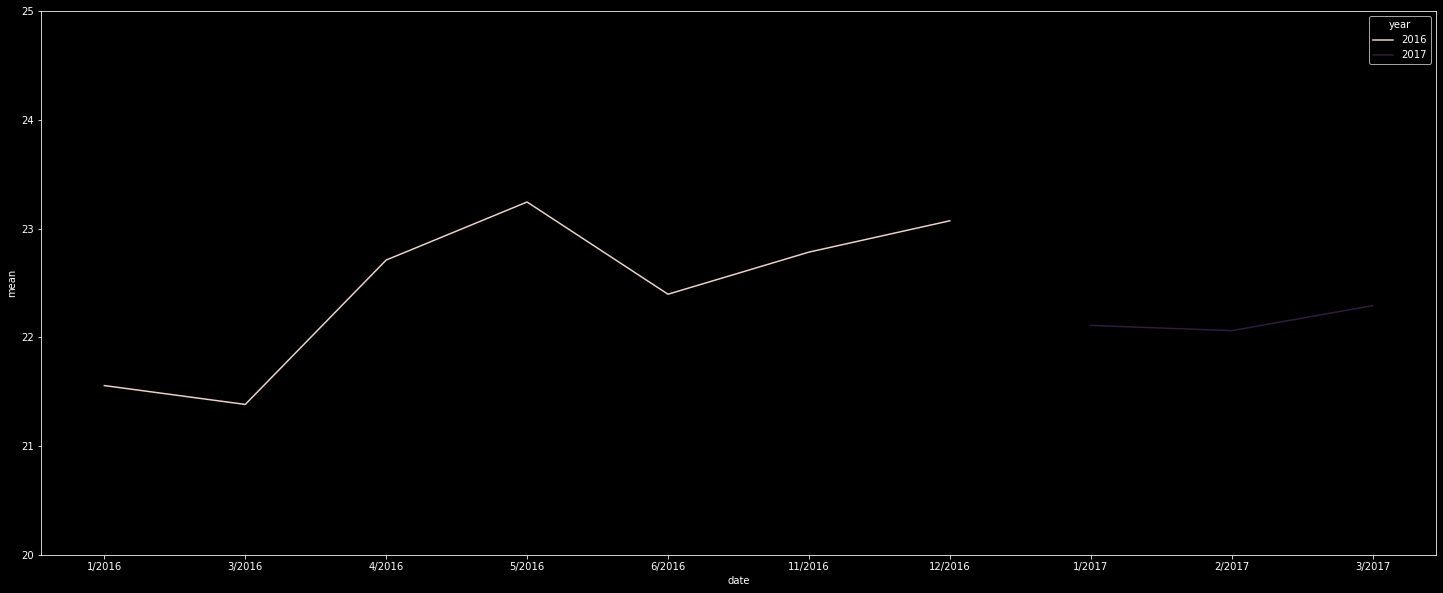

In [77]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(25, 10))
ystart = 20
ylimit = 25
fig_dims = (35, 5)
g = sns.lineplot(data=mean_dict, x="date", y="mean", hue="year")
g.axes.set_ylim(ystart,ylimit)

<AxesSubplot:xlabel='year', ylabel='temperature'>

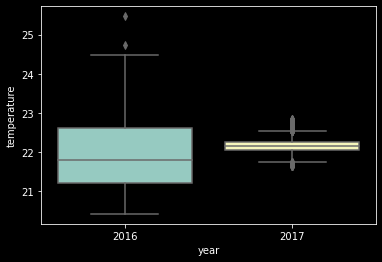

In [78]:
sns.boxplot(y="temperature", data=df, x="year")

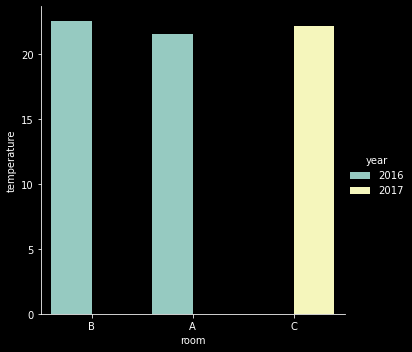

In [79]:
sns.catplot(
    data=df, kind="bar",
    x="room", y="temperature", hue="year"
)

<AxesSubplot:xlabel='room', ylabel='temperature'>

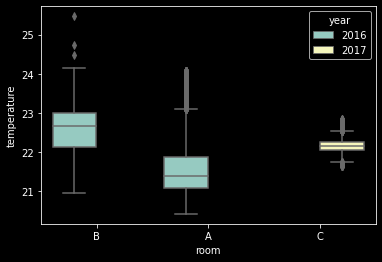

In [80]:
sns.boxplot(y="temperature", data=df, x="room", hue="year")

<AxesSubplot:ylabel='temperature'>

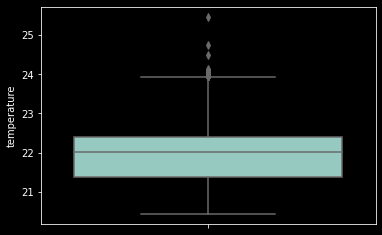

In [81]:
sns.boxplot(y="temperature", data=df)

## Heatmap

In [95]:
def convert_room(x):
    if(str(x).upper() == 'A'):
        return 0
    if(str(x).upper() == 'B'):
        return 1
    if(str(x).upper() == 'C'):
        return 2
    else:
        return -1
df['room'] = df['room'].apply(convert_room)

<AxesSubplot:>

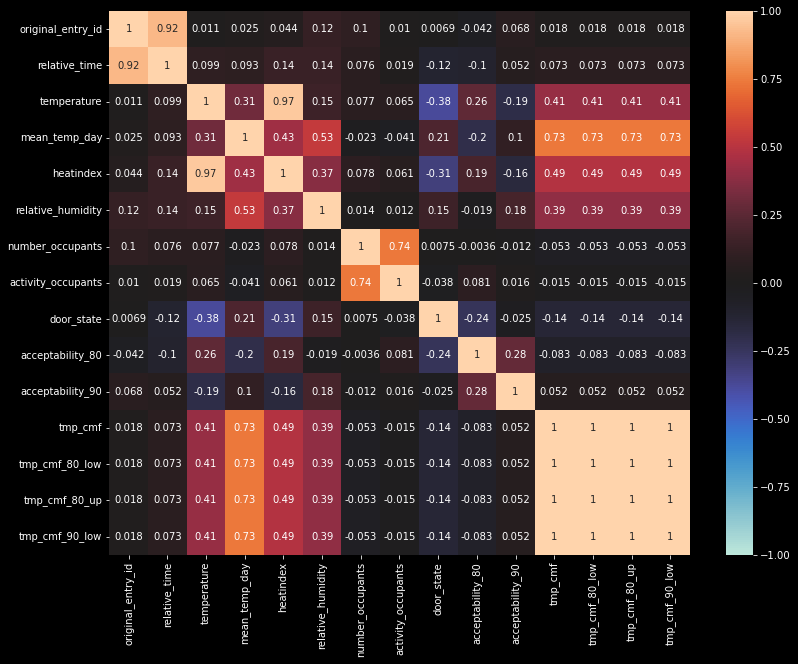

In [164]:
plt.rcParams["figure.figsize"] = (13,10)
mask = df[['original_entry_id', 'room', 
       'relative_time',  'temperature', 'mean_temp_day', 'heatindex',
       'relative_humidity',  'number_occupants', 'activity_occupants',
       'door_state','acceptability_80', 'acceptability_90', 
       'tmp_cmf', 
       'tmp_cmf_80_low', 
       'tmp_cmf_80_up', 
       'tmp_cmf_90_low']]
sns.heatmap(mask.corr(), annot = True,  vmin =-1, vmax = 1, center = 0)

<AxesSubplot:>

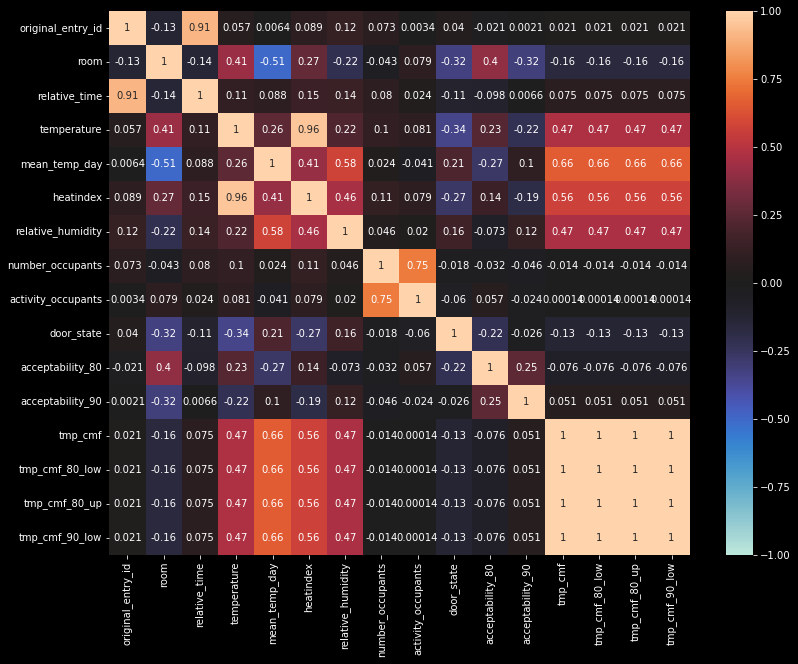

In [96]:
plt.rcParams["figure.figsize"] = (13,10)
mask = ligsensor_result_two[['original_entry_id', 'room', 
       'relative_time',  'temperature', 'mean_temp_day', 'heatindex',
       'relative_humidity',  'number_occupants', 'activity_occupants',
       'door_state','acceptability_80', 'acceptability_90', 
       'tmp_cmf', 
       'tmp_cmf_80_low', 
       'tmp_cmf_80_up', 
       'tmp_cmf_90_low']]
sns.heatmap(mask.corr(), annot = True,  vmin =-1, vmax = 1, center = 0)